# Fidelity of sequentially generated 2D cluster states

In this notebook we study the preparation fidelity of 2D cluster states generated with a sequential emission protocol.

We consier two qutrits as the sources and a register of $N$ qubits which stores the cluster state. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import cirq

import qutrit_utils

In [14]:
### system parameters
qus = [2,4,6,8,10]

waittimes = [0.125, 0.2, 0.125, 0.125, 0.075, 0.205, 0.275]
coherence_times1 = [27, 22, 16, 12]
coherence_times2 = [22, 23, 4, 6]

nparams = [0.035, 0.02, 0.01, 0.045]

In [3]:
##-- initialize the simulators
simulator = cirq.Simulator()
dsim = cirq.DensityMatrixSimulator()

In [4]:
qutrit_utils.leak_cluster_state_2D(4, 0.0, 0.0, 0.0)

┌────────────────────┐                   ┌──┐
0 (d=3): ───[H]───[Q3_CZ]───[pi_ef]────[CX_Q3_Q2]──────────────[H]───[Q3_CZ]────X─────
                  │                    │                             │          │
1 (d=3): ───[H]───@─────────[pi_ef]────┼─────────[CX_Q3_Q2]────[H]───@──────────┼X────
                                       │         │                              ││
2: ────────────────────────────────────┼─────────┼──────────────────────────────X┼────
                                       │         │                               │
3: ────────────────────────────────────┼─────────┼───────────────────────────────X────
                                       │         │
4: ────────────────────────────────────@─────────┼────────────────────────────────────
                                                 │
5: ──────────────────────────────────────────────@────────────────────────────────────
                                      └────────────────────┘                   └──┘

In [5]:
qutrit_utils.noisy_cluster_state_2D(4, waittimes, coherence_times1, coherence_times2, nparams)

┌────────────────────┐                                                                                                                                           ┌──┐
0 (d=3): ───[Q3_AD]───[Q3_PD]───[H]───[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]───[Q3_CZ]───[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]───[pi_ef]───[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]────[CX_Q3_Q2]──────────────[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]───[H]───[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]───[Q3_CZ]───[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]────X─────[Q3_AD]───[Q3_PD]───
                                                                              │                                                                                                    │                                                                                                             │                                                  │
1 (d=3): ───[Q3_AD]───[Q3_PD]───[H]───[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]───@─────────[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]───[pi_ef]───[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]────┼─────────[CX_Q3_Q2]────[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]───[H]───[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]───@─────────[Q3_AD]───[Q3_PD]───[Q3_AD]───[Q3_PD]────┼X────[Q3_AD]───[Q3_PD]───
                                                                                                                                                                                   │         │                                                                                                                                                      ││
2: ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼─────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────X┼────────────────────────
                                                                                                                                                                                   │         │                                                                                                                                                       │
3: ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼─────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────X────────────────────────
                                                                                                                                                                                   │         │
4: ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────@─────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                                                                                                                             │
5: ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────@────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                                                                                                                  └────────────────────┘                      

## decoherence limited fidelities

In [6]:
%%time
### looking at the fidelity
fides_deco = []

for qu in qus:
    ideal_state = simulator.simulate(qutrit_utils.leak_cluster_state_2D(qu,0,0,0)).final_state_vector
    deco_state = dsim.simulate(qutrit_utils.noisy_cluster_state_2D(qu, waittimes, coherence_times1, coherence_times2, [0,0,0,0])).final_density_matrix
    
    fide_deco = np.dot(np.conj(ideal_state), np.dot(deco_state, ideal_state))
    fides_deco.append(fide_deco.real)
    print("fidelity for %d qubits, done -->>" % qu)
#

fidelity for 2 qubits, done -->>
fidelity for 4 qubits, done -->>
fidelity for 6 qubits, done -->>
fidelity for 8 qubits, done -->>
fidelity for 10 qubits, done -->>
CPU times: user 35.7 s, sys: 9.79 s, total: 45.5 s
Wall time: 36.1 s


## noisy state fidelities

In [15]:
%%time
### looking at the fidelity
fides_noisy = []

for qu in qus:
    ideal_state = simulator.simulate(qutrit_utils.leak_cluster_state_2D(qu,0,0,0)).final_state_vector
    noisy_state = dsim.simulate(qutrit_utils.noisy_cluster_state_2D(qu, waittimes, coherence_times1, coherence_times2, nparams)).final_density_matrix
    
    fide_noisy = np.dot(np.conj(ideal_state), np.dot(noisy_state, ideal_state))
    fides_noisy.append(fide_noisy.real)
    print("fidelity for %d qubits, done -->>" % qu)
#

fidelity for 2 qubits, done -->>
fidelity for 4 qubits, done -->>
fidelity for 6 qubits, done -->>
fidelity for 8 qubits, done -->>
fidelity for 10 qubits, done -->>
CPU times: user 41.5 s, sys: 17.3 s, total: 58.8 s
Wall time: 37.1 s


## Plot!

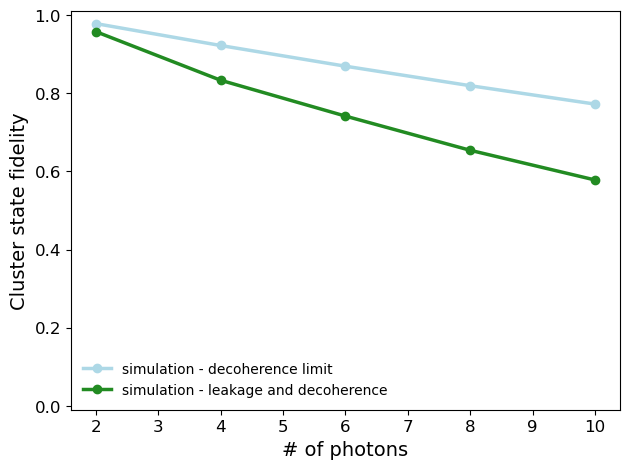

In [20]:
plt.plot(qus, fides_deco, "o-", label = "simulation - decoherence limit", c = "lightblue", lw = 2.5)
plt.plot(qus, fides_noisy, "o-", label = "simulation - leakage and decoherence", c = "forestgreen", lw = 2.5)

plt.legend(frameon = False)
plt.ylabel('Cluster state fidelity', fontsize = 14)
plt.xlabel('# of photons', fontsize = 14)
plt.tick_params(axis = "both", labelsize = 12)
plt.ylim(-0.01,1.01)

plt.tight_layout()
plt.show()